In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data["target"]=iris.target
data["target"].unique()

array([0, 1, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
data[data.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
iris.target_names[0]

'setosa'

In [49]:
data["flower_name"]=data.target.apply(lambda x: iris.target_names[x])
data.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [18]:
data0=data[data.target==0]
data1=data[data.target==1]
data2=data[data.target==2]

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


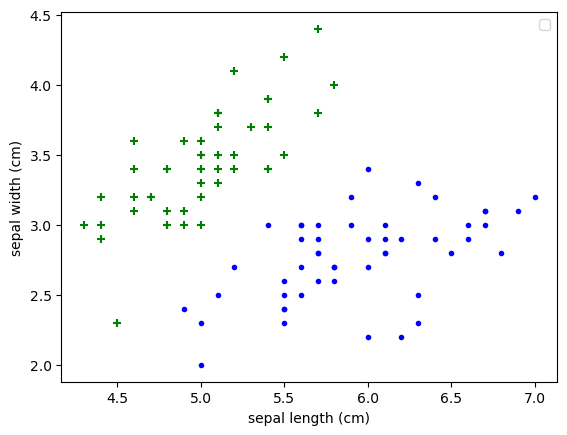

In [24]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(data0["sepal length (cm)"],data0["sepal width (cm)"],marker="+",color="green")
plt.scatter(data1["sepal length (cm)"],data1["sepal width (cm)"],marker=".",color="blue")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


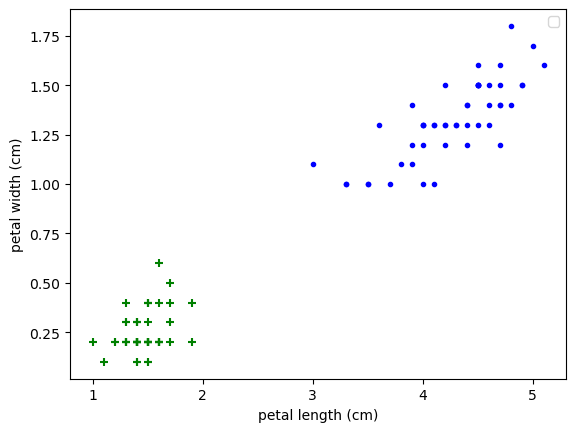

In [25]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(data0["petal length (cm)"],data0["petal width (cm)"],marker="+",color="green")
plt.scatter(data1["petal length (cm)"],data1["petal width (cm)"],marker=".",color="blue")
plt.legend()

In [32]:
X=data.drop(["target","flower_name"],axis=1)
y=data.target

In [26]:
from sklearn.model_selection import train_test_split


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [33]:
from sklearn.svm import SVC


In [36]:
model=SVC()

In [37]:
model.fit(X_train,y_train)

SVC()

In [38]:
y_pred=model.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9666666666666667

<AxesSubplot:>

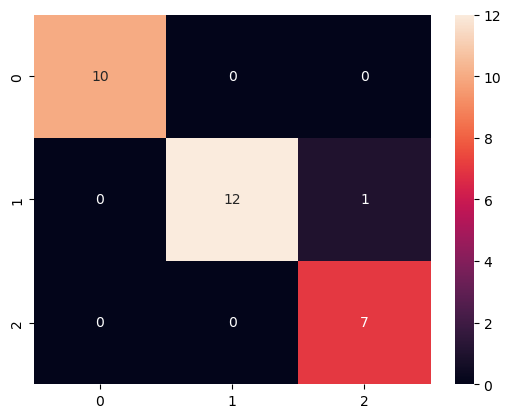

In [44]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sys
sys.heatmap(cm,annot=True)

In [51]:
import numpy as np
input_data=(6.7,3.0,5.2,2.3)
input_data_numpy=np.array(input_data).reshape(1,-1)
predict_data=model.predict(input_data_numpy)
if predict_data==0:
    print("setosa")
elif predict_data==1:
    
    print("versicolor")
else:
    print("virginica")

virginica


C:\Users\Jaswanth chowdary\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
